In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [54]:
df = pd.read_csv('../../data/nsidc/extent_tables/N_seaice_extent_daily_v3.0(1).csv').iloc[1:,:]


In [55]:
# Step 1: Remove placeholder header row
df = df[1:].copy()

# Step 2: Clean column names and strip whitespaces from values
df.columns = df.columns.str.strip()
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Step 3: Convert Year, Month, Day to integers
df["Year"] = df["Year"].astype(int)
df["Month"] = df["Month"].astype(int)
df["Day"] = df["Day"].astype(int)

# Create proper datetime column
df["Date"] = pd.to_datetime(df[["Year", "Month", "Day"]])

# Step 4: Convert Extent and Missing to numeric
df["Extent"] = pd.to_numeric(df["Extent"])
df["Missing"] = pd.to_numeric(df["Missing"])

# Step 5: Drop 'Source Data' if not needed for analysis
df.drop(columns=["Source Data"], inplace=True)

# Reorder columns for clarity
df = df[["Date", "Year", "Month", "Day", "Extent", "Missing"]]

# Display cleaned data
df.head()


,Date,Year,Month,Day,Extent,Missing
2,1978-10-28,1978,10,28,10.420,0.0
3,1978-10-30,1978,10,30,10.557,0.0
4,1978-11-01,1978,11,1,10.670,0.0
5,1978-11-03,1978,11,3,10.777,0.0
6,1978-11-05,1978,11,5,10.968,0.0


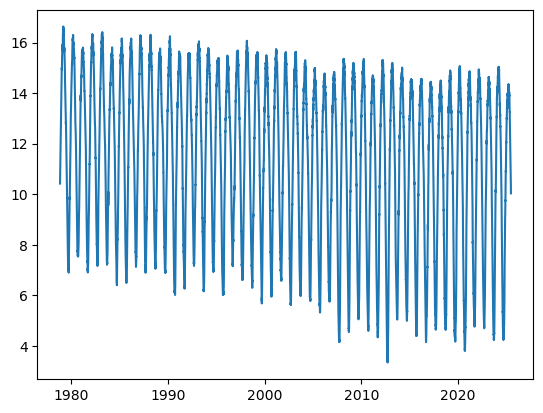

In [58]:
plt.plot(df['Date'], df["Extent"])